In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid=pd.read_csv('/home/rayan/Downloads/owid-covid-data.csv')

In [3]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
covid['date']= pd.to_datetime(covid['date'])

In [6]:
covid.shape

(429435, 67)

In [7]:
covid.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [8]:
threshold = 0.7 * len(covid)
high_missing = covid.columns[covid.isnull().sum() > threshold]

print("Columns to drop:")
print(high_missing)


Columns to drop:
Index(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality',
       'excess_mortality_cumulative_per_million'],
      dtype='object')


In [9]:
covid = covid.drop(columns=high_missing)


In [10]:
keep_cols = [
    "iso_code", "continent", "location", "date",
    "total_cases", "new_cases",
    "total_deaths", "new_deaths",
    "total_vaccinations", "people_vaccinated",
    "people_fully_vaccinated", "new_vaccinations",
    "population", "stringency_index"
]

# Keep only columns that exist after dropping
covid = covid[[col for col in keep_cols if col in covid.columns]]


In [11]:
covid = covid.sort_values(["location", "date"])

num_cols = [
    col for col in ["new_cases","total_cases","new_deaths","total_deaths",
                    "new_vaccinations","people_vaccinated",
                    "people_fully_vaccinated","total_vaccinations"]
    if col in covid.columns
]

for col in num_cols:
    covid[col] = covid.groupby("location")[col].ffill()

for col in num_cols:
    covid[col] = covid.groupby("location")[col].bfill()


In [12]:
for col in num_cols:
    covid[col] = covid[col].fillna(covid[col].median())


In [13]:
covid['continent'] = covid['continent'].fillna('Unknown')
covid['stringency_index'] = covid['stringency_index'].fillna(covid['stringency_index'].median())


In [14]:
covid.isnull().sum()

iso_code            0
continent           0
location            0
date                0
total_cases         0
new_cases           0
total_deaths        0
new_deaths          0
population          0
stringency_index    0
dtype: int64

In [15]:
covid.duplicated().sum()

np.int64(4872)

In [16]:
covid = covid.drop_duplicates(subset=['location', 'date'], keep='first')


In [17]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,stringency_index
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772,0.0


In [18]:
for col in ['new_cases','new_deaths','total_cases','total_deaths','population']:
    print(col, (covid[col] < 0).sum())


new_cases 0
new_deaths 0
total_cases 0
total_deaths 0
population 0


In [19]:
covid['location'] = covid['location'].str.strip()


In [20]:
covid['cases_per_million'] = covid['total_cases'] / covid['population'] * 1e6
covid['deaths_per_million'] = covid['total_deaths'] / covid['population'] * 1e6


In [21]:
covid.to_csv("/home/rayan/Downloads/covid_cleaned.csv", index=False)


In [22]:
data=pd.read_csv("/home/rayan/Downloads/covid_cleaned.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,stringency_index,cases_per_million,deaths_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,41128772,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,41128772,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,41128772,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,41128772,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,41128772,0.0,0.0,0.0


In [23]:
data.shape

(421665, 12)

In [29]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')


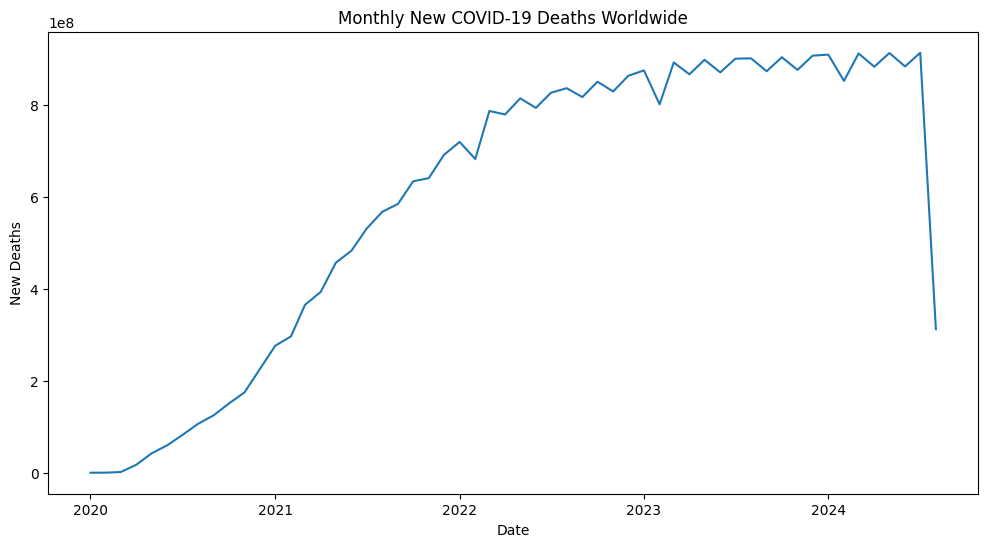

In [31]:
death_bymonth = data.groupby(data['date'].dt.to_period('M'))['total_deaths'].sum().reset_index()
death_bymonth['date'] = death_bymonth['date'].dt.to_timestamp()
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='total_deaths', data=death_bymonth)
plt.title('Monthly New COVID-19 Deaths Worldwide')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()

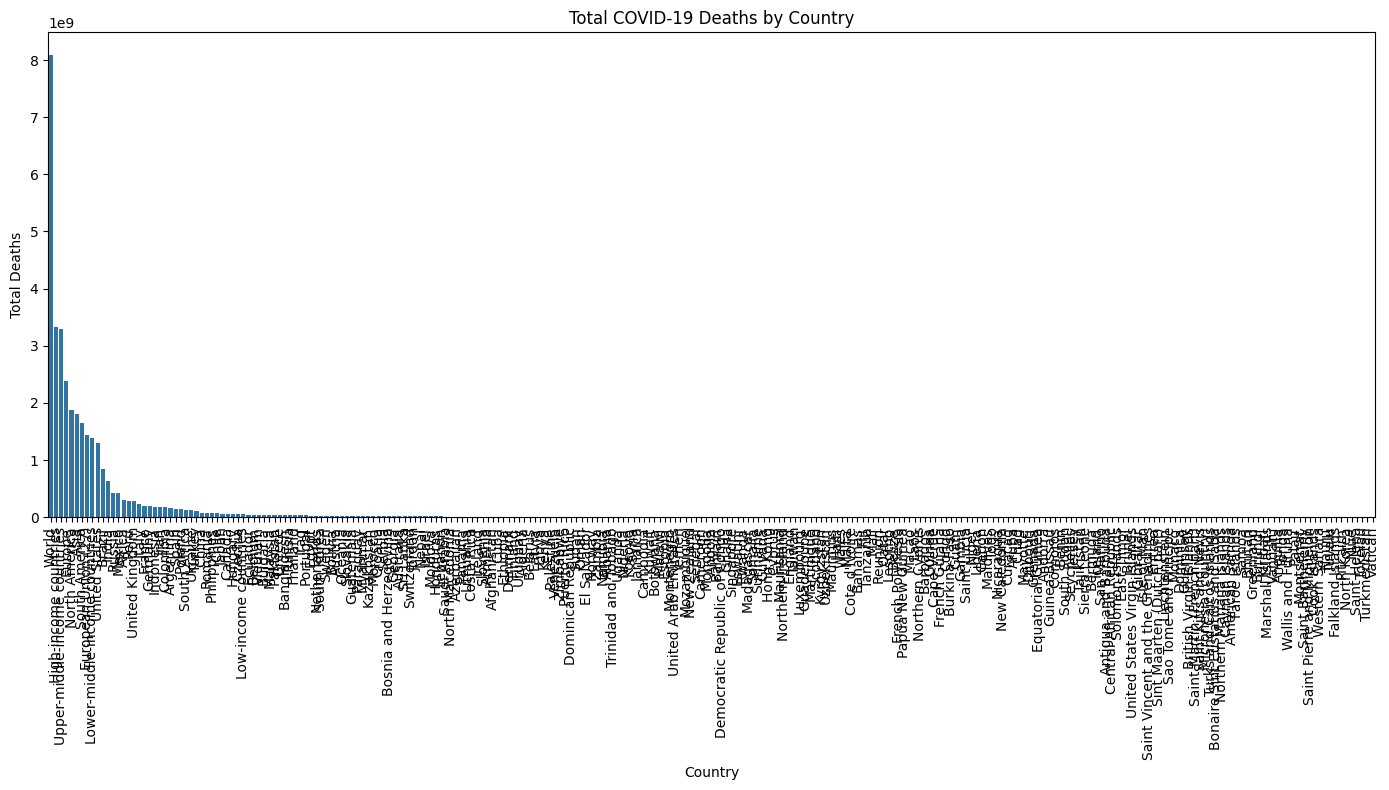

In [34]:
location_for_death = data.groupby('location')['total_deaths'].sum().reset_index()

location_for_death = location_for_death.sort_values('total_deaths', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=location_for_death, x='location', y='total_deaths')

plt.title('Total COVID-19 Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Total Deaths')

plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


In [35]:
numeric_data = data.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                    total_cases  new_cases  total_deaths  new_deaths  \
total_cases            1.000000   0.126547      0.945938    0.098989   
new_cases              0.126547   1.000000      0.155071    0.505709   
total_deaths           0.945938   0.155071      1.000000    0.161893   
new_deaths             0.098989   0.505709      0.161893    1.000000   
population             0.691521   0.147876      0.757003    0.215296   
stringency_index      -0.007101   0.002252     -0.002663    0.012608   
cases_per_million      0.069901  -0.000722      0.034556   -0.016512   
deaths_per_million     0.106161   0.009987      0.125711    0.004785   

                    population  stringency_index  cases_per_million  \
total_cases           0.691521         -0.007101           0.069901   
new_cases             0.147876          0.002252          -0.000722   
total_deaths          0.757003         -0.002663           0.034556   
new_deaths            0.215296          0.012608          -0.016512

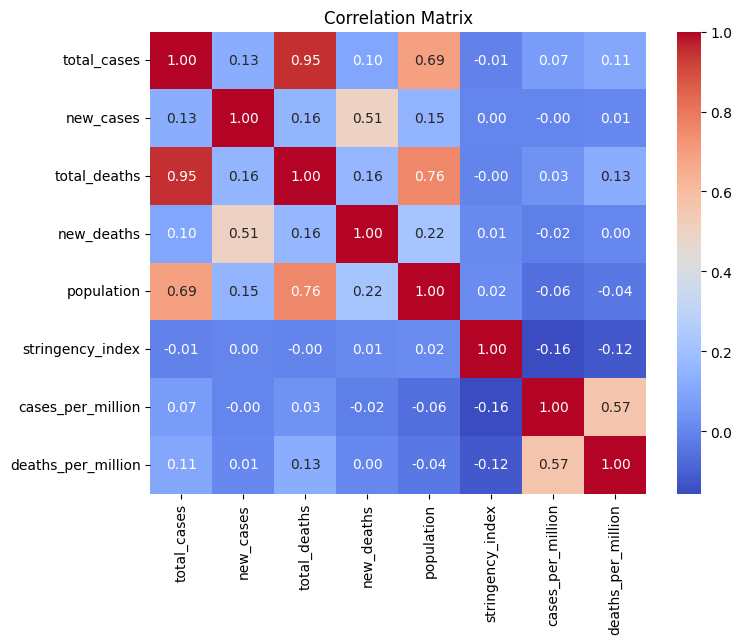

In [36]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
data['continent'].value_counts()

continent
Africa           95419
Europe           90637
Asia             83185
North America    68638
Oceania          40183
South America    23440
Unknown          20163
Name: count, dtype: int64

In [ ]:
data['location'].value_counts()

location
Asia                     1684
Europe                   1684
European Union (27)      1684
High-income countries    1684
World                    1684
                         ... 
Scotland                 1305
Wales                    1198
Macao                     795
Northern Cyprus           691
Western Sahara              1
Name: count, Length: 255, dtype: int64

   year    population
0  2020  1.289289e+08
1  2021  1.275941e+08
2  2022  1.275586e+08
3  2023  1.289020e+08
4  2024  1.344664e+08


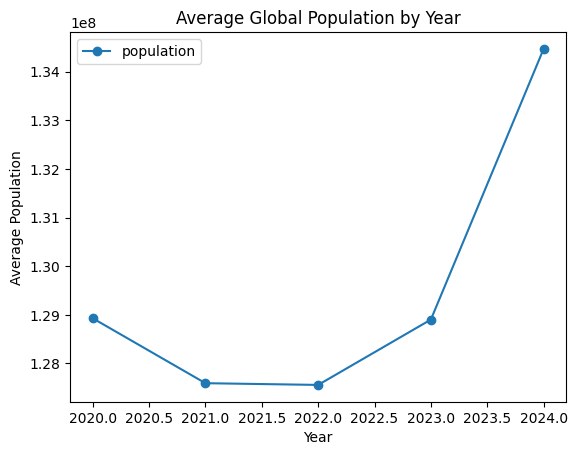

In [40]:
data['year'] = data['date'].dt.year
population_by_year = data.groupby('year')['population'].mean().reset_index()
print(population_by_year)
population_by_year.plot(x='year', y='population', marker='o')
plt.title('Average Global Population by Year')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.show()  

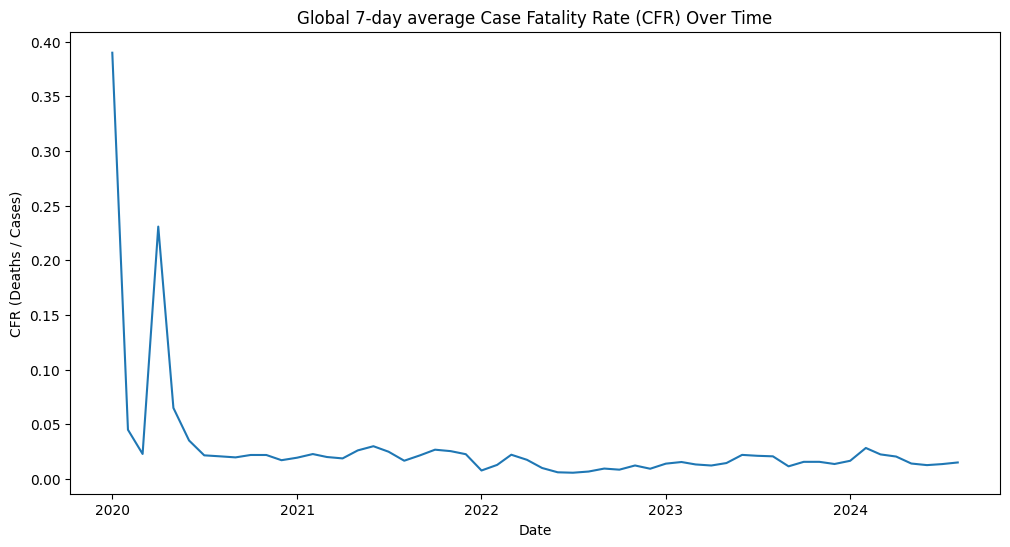

In [41]:
data['cfr'] = data['new_deaths'] / data['new_cases']

data['cfr_7d'] = data.groupby('location')['cfr'].transform(lambda x: x.rolling(7, min_periods=1).mean())

cfr_month = data.groupby(data['date'].dt.to_period('M'))['cfr_7d'].mean().reset_index()
cfr_month['date'] = cfr_month['date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cfr_month, x='date', y='cfr_7d')
plt.title("Global 7-day average Case Fatality Rate (CFR) Over Time")
plt.xlabel("Date")
plt.ylabel("CFR (Deaths / Cases)")
plt.show()

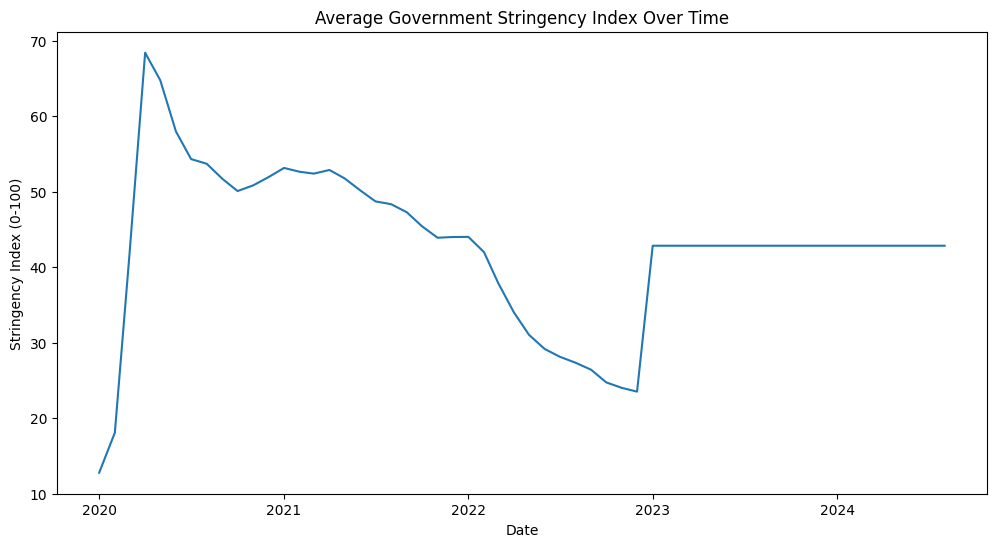

In [42]:
strin_month = data.groupby(data['date'].dt.to_period('M'))['stringency_index'].mean().reset_index()
strin_month['date'] = strin_month['date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=strin_month, x='date', y='stringency_index')
plt.title("Average Government Stringency Index Over Time")
plt.xlabel("Date")
plt.ylabel("Stringency Index (0-100)")
plt.show()

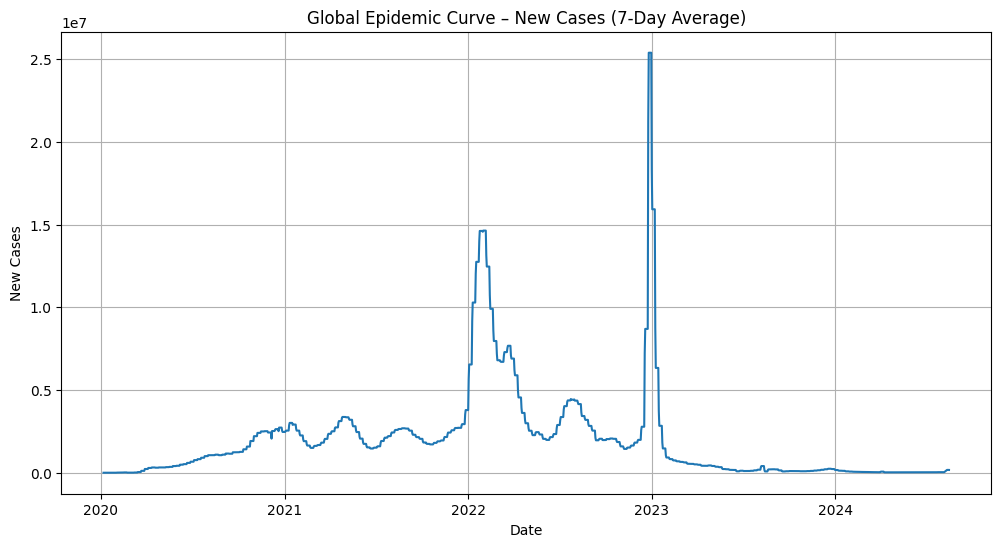

In [43]:
epicurve_cases = data.groupby('date')['new_cases'].sum().rolling(7).mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=epicurve_cases, x='date', y='new_cases')
plt.title('Global Epidemic Curve – New Cases (7-Day Average)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

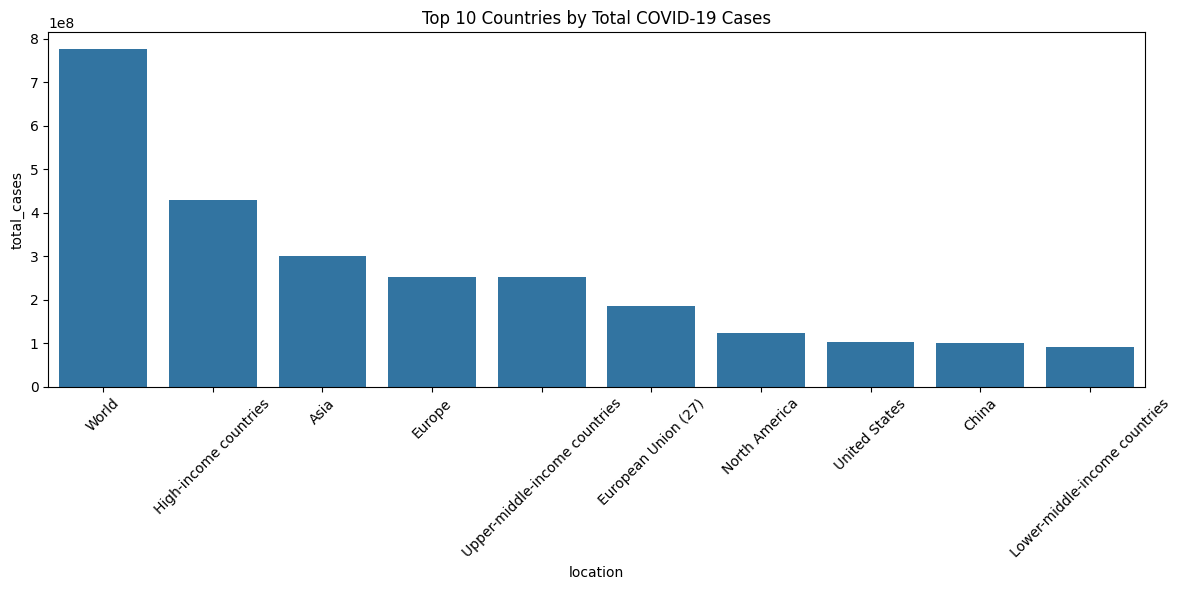

In [44]:
top10_cases = (
    data.groupby('location')['total_cases']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_cases, x='location', y='total_cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


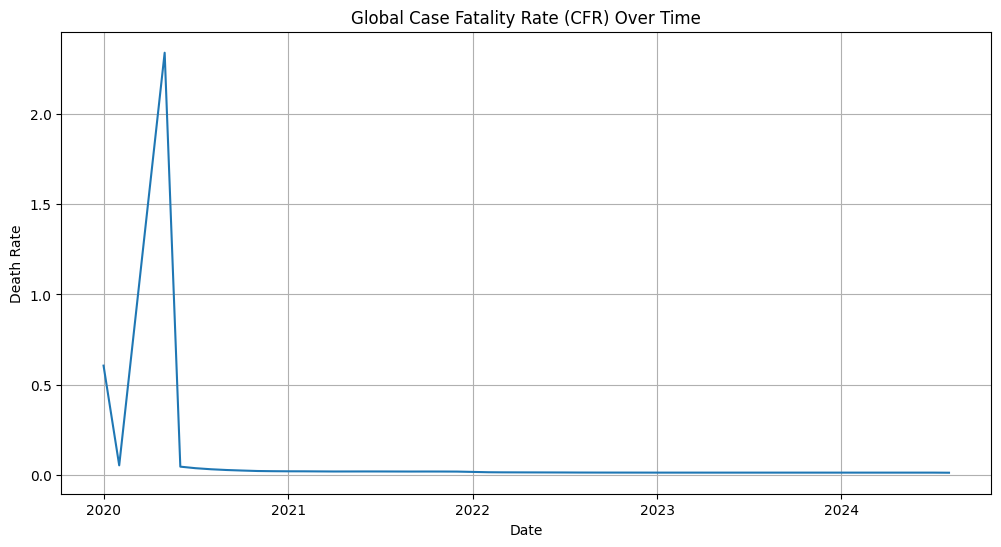

In [46]:
data['death_rate'] = data['total_deaths'] / data['total_cases']


cfr_month = (
    data.groupby(data['date'].dt.to_period('M'))['death_rate']
    .mean()
    .reset_index()
)
cfr_month['date'] = cfr_month['date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=cfr_month, x='date', y='death_rate')
plt.title('Global Case Fatality Rate (CFR) Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()
